In [40]:
# Import all necessary libraries and framework
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [7]:
# Import the data
data = pd.read_csv('PLNT.csv')
data['Date'] = pd.to_datetime(data['Date'])
print(data.head())

        Date       Open       High        Low      Close  Adj Close   Volume
0 2018-08-09  48.599998  49.490002  48.509998  48.790001  48.790001  1776600
1 2018-08-10  51.799999  53.410000  51.000000  51.939999  51.939999  3686700
2 2018-08-13  50.730000  51.000000  48.950001  48.990002  48.990002  1926800
3 2018-08-14  49.259998  52.730000  49.139999  52.680000  52.680000  2259200
4 2018-08-15  52.070000  52.639999  51.389999  51.910000  51.910000  1051200


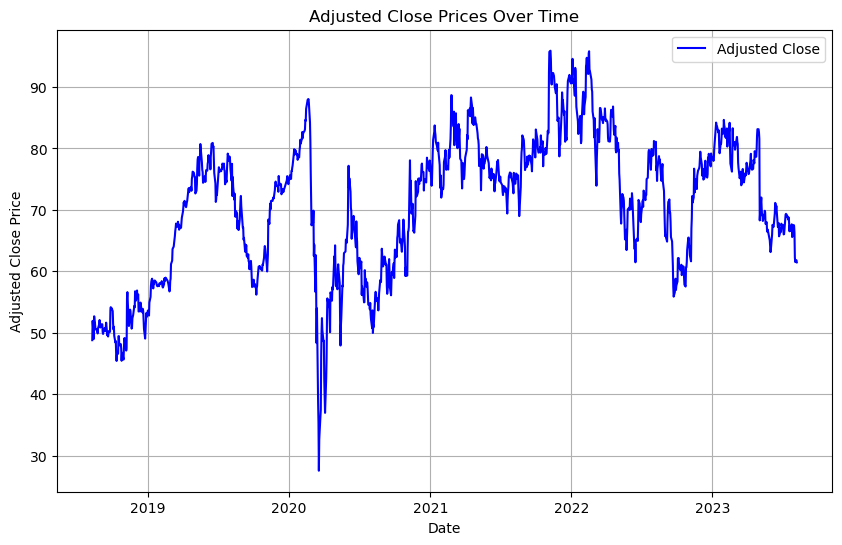

In [9]:
# Vsiualizing the adjustment close price on the data
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Adj Close'], linestyle='-', color='b', label='Adjusted Close')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.title('Adjusted Close Prices Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
# Define the fifth year range
min_date = data['Date'].min()
fifth_year_start = min_date + pd.DateOffset(years=4)
fifth_year_end = min_date + pd.DateOffset(years=5)

# Prepare the training data
training_data = data[data['Date'] < fifth_year_start][['Date', 'Adj Close']]

# Prepare the testing data for the fifth year
testing_data = data[(data['Date'] >= fifth_year_start) & (data['Date'] < fifth_year_end)][['Date', 'Adj Close']]

# Extracting years from the 'Date' column
training_data['Year'] = training_data['Date'].dt.year
testing_data['Year'] = testing_data['Date'].dt.year

# Splitting features and target variables
X_train = training_data[['Year']]
y_train = training_data['Adj Close']
X_test = testing_data[['Year']]
y_test_actual = testing_data['Adj Close']

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions for the fifth year
y_test_predicted = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_actual, y_test_predicted)

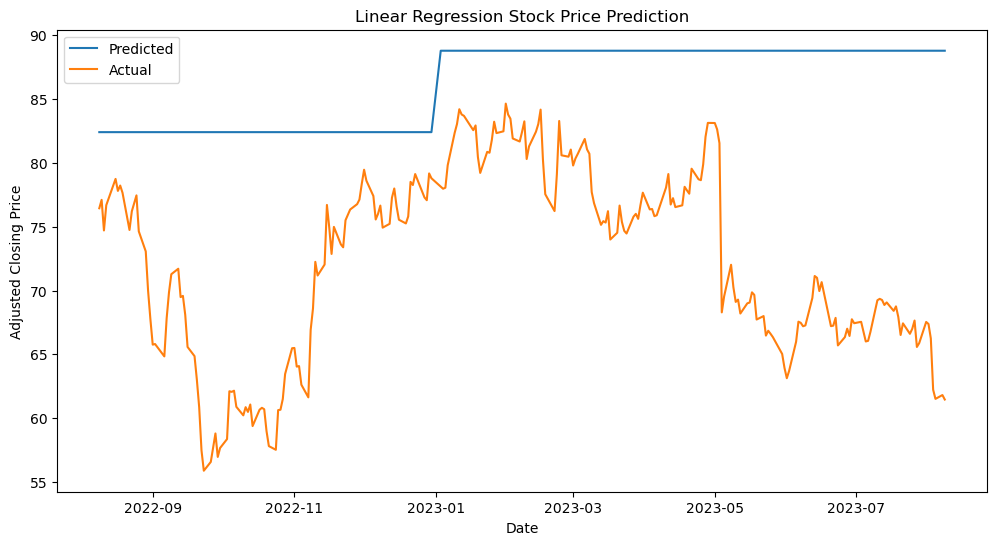

Mean Squared Error: 243.03011987971416


In [12]:
# Plotting the predictions and actual values
plt.figure(figsize=(12, 6))
plt.plot(testing_data['Date'], y_test_predicted, label='Predicted')
plt.plot(testing_data['Date'], y_test_actual, label='Actual')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.title('Linear Regression Stock Price Prediction')
plt.legend()
plt.show()

print(f"Mean Squared Error: {mse}")

In [15]:
# Train an SVM regression model
model_svm = SVR(kernel='rbf', C=1e3, gamma=0.1)
model_svm.fit(X_train, y_train)

# Make predictions for the fifth year
y_test_predicted_svm = model_svm.predict(X_test)

# Calculate Mean Squared Error
mse_svm = mean_squared_error(y_test_actual, y_test_predicted_svm)

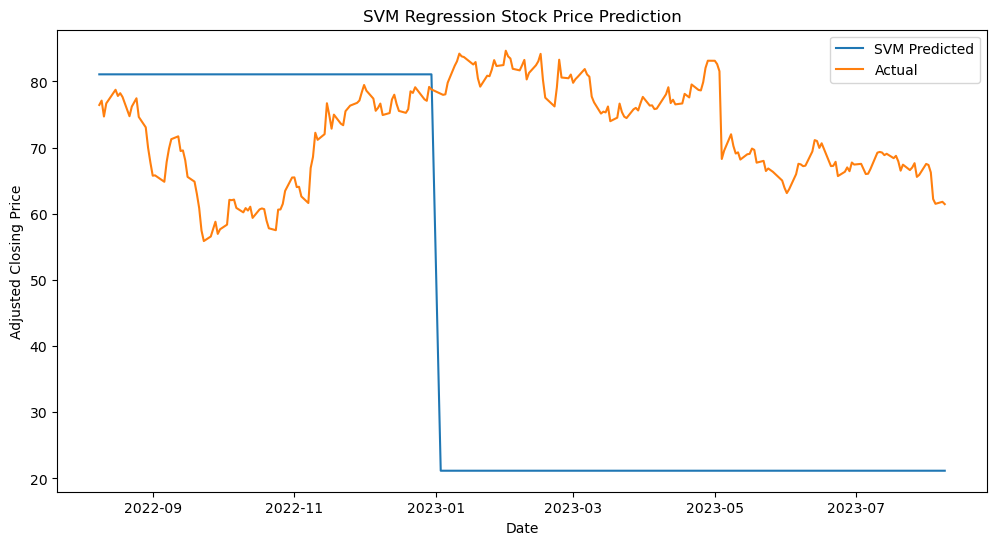

SVM Mean Squared Error: 1782.689985333446


In [16]:
# Plotting the predictions and actual values
plt.figure(figsize=(12, 6))
plt.plot(testing_data['Date'], y_test_predicted_svm, label='SVM Predicted')
plt.plot(testing_data['Date'], y_test_actual, label='Actual')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.title('SVM Regression Stock Price Prediction')
plt.legend()
plt.show()

print(f"SVM Mean Squared Error: {mse_svm}")

In [19]:
# Train a Random Forest Regressor model
model_rf = RandomForestRegressor(n_estimators=100, random_state=0)
model_rf.fit(X_train, y_train)

# Make predictions for the fifth year
y_test_predicted_rf = model_rf.predict(X_test)

# Calculate Mean Squared Error
mse_rf = mean_squared_error(y_test_actual, y_test_predicted_rf)

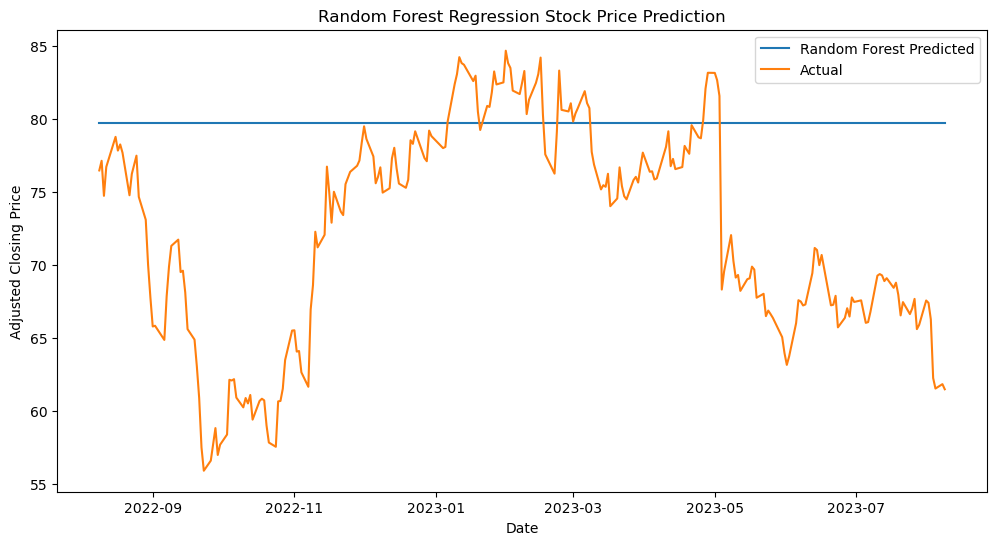

Random Forest Mean Squared Error: 108.734349024183


In [20]:
# Plotting the predictions and actual values
plt.figure(figsize=(12, 6))
plt.plot(testing_data['Date'], y_test_predicted_rf, label='Random Forest Predicted')
plt.plot(testing_data['Date'], y_test_actual, label='Actual')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.title('Random Forest Regression Stock Price Prediction')
plt.legend()
plt.show()

print(f"Random Forest Mean Squared Error: {mse_rf}")

In [28]:
# Define the fifth year range
min_date = data['Date'].min()
fifth_year_start = min_date + pd.DateOffset(years=4)
fifth_year_end = min_date + pd.DateOffset(years=5)

# Prepare the training data
training_data = data[data['Date'] < fifth_year_start][['Date', 'Adj Close']]

# Prepare the testing data for the fifth year
testing_data = data[(data['Date'] >= fifth_year_start) & (data['Date'] < fifth_year_end)][['Date', 'Adj Close']]

# Extracting years and day of the week from the 'Date' column
training_data['Year'] = training_data['Date'].dt.year
training_data['DayOfWeek'] = training_data['Date'].dt.dayofweek
testing_data['Year'] = testing_data['Date'].dt.year
testing_data['DayOfWeek'] = testing_data['Date'].dt.dayofweek

# Create lagged features
for lag in range(1, 4):
    training_data[f'Adj_Close_Lag_{lag}'] = training_data['Adj Close'].shift(lag)
    testing_data[f'Adj_Close_Lag_{lag}'] = testing_data['Adj Close'].shift(lag)

# Create moving averages
for window in [7, 30]:
    training_data[f'Moving_Avg_{window}'] = training_data['Adj Close'].rolling(window=window).mean()
    testing_data[f'Moving_Avg_{window}'] = testing_data['Adj Close'].rolling(window=window).mean()

# Splitting features and target variables
X_train = training_data.drop(['Date', 'Adj Close'], axis=1)
y_train = training_data['Adj Close']
X_test = testing_data.drop(['Date', 'Adj Close'], axis=1)
y_test_actual = testing_data['Adj Close']

# Handle missing values with SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train a Random Forest Regressor model
model_rf = RandomForestRegressor(n_estimators=100, random_state=0)
model_rf.fit(X_train_imputed, y_train)

# Handle missing values in testing data with SimpleImputer
X_test_imputed = imputer.transform(X_test)

# Make predictions for the fifth year
y_test_predicted_rf = model_rf.predict(X_test_imputed)

# Calculate Mean Squared Error
mse_rf = mean_squared_error(y_test_actual, y_test_predicted_rf)

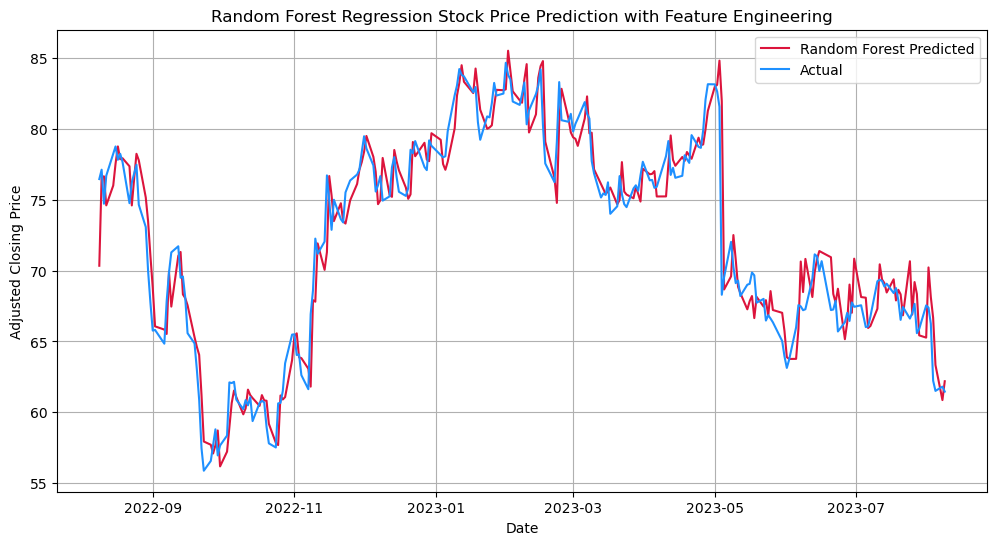

Random Forest Mean Squared Error with Feature Engineering: 3.866565700607228


In [30]:
# Plotting the predictions and actual values
plt.figure(figsize=(12, 6))
plt.plot(testing_data['Date'], y_test_predicted_rf, color='crimson', label='Random Forest Predicted')
plt.plot(testing_data['Date'], y_test_actual, color='dodgerblue', label='Actual')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Price')
plt.title('Random Forest Regression Stock Price Prediction with Feature Engineering')
plt.legend()
plt.grid(True)  # Add grid lines
plt.show()

print(f"Random Forest Mean Squared Error with Feature Engineering: {mse_rf}")